In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [9]:
data = pd.read_csv("464_complete_data.csv")

In [66]:
data.columns

Index(['Unnamed: 0', 'word1', 'word2', 'human_similarity',
       'gpt_similarity_left', 'gpt_similarity_right', 'gpt_similarity',
       'human_standardized', 'gpt_standardized'],
      dtype='object')

# Hist graph

most human similarity scores are around 0.55~0.65

most GPT similarity scores are around 0.5 ~ 0.7

In [58]:
scaler = MinMaxScaler()
data['human_standardized'] = scaler.fit_transform(data[['human_similarity']])

scaler = MinMaxScaler()
data['gpt_standardized'] = scaler.fit_transform(data[['gpt_similarity']])

array([[<Axes: title={'center': 'human_standardized'}>]], dtype=object)

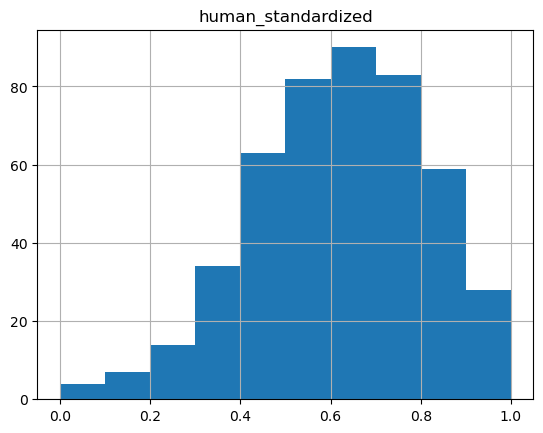

In [60]:
data[['human_standardized']].hist()

array([[<Axes: title={'center': 'gpt_standardized'}>]], dtype=object)

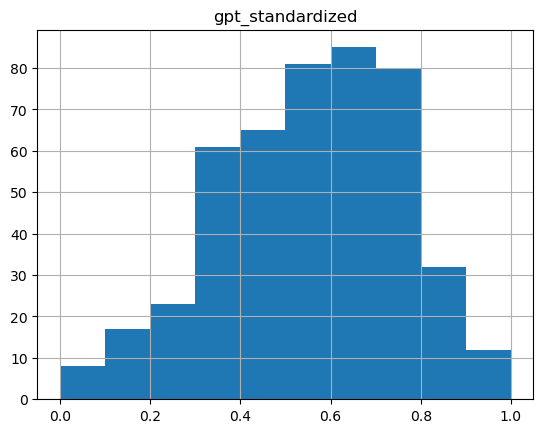

In [61]:
data[['gpt_standardized']].hist()

In [77]:
first_range = 0.4
second_range = 0.7

print(
    """
    Human score <= {6} : {0}, GPT score <= {6} : {1}
    {6} < Human score <= {7} : {2}, {6} < GPT score <= 0.7 : {3}
    Human score > {7} : {4}, GPT score > {7} : {5}
    """.format(
        data[data['human_standardized'] <= first_range].shape[0],
        data[data['gpt_standardized'] <= first_range].shape[0],
        data[(data['human_standardized'] <= second_range) & (data['human_standardized'] > first_range)].shape[0],
        data[(data['gpt_standardized'] <= second_range) & (data['gpt_standardized'] > first_range)].shape[0],
        data[data['human_standardized'] > second_range].shape[0],
        data[data['gpt_standardized'] > second_range].shape[0], 
        first_range,
        second_range))


    Human score <= 0.4 : 59, GPT score <= 0.4 : 109
    0.4 < Human score <= 0.7 : 235, 0.4 < GPT score <= 0.7 : 231
    Human score > 0.7 : 170, GPT score > 0.7 : 124
    


## Mean
Correlation Coefficient: 0.4076391246925853

R-squared: 0.16616965598013755

positive correlation, but weak linear relationship

In [62]:
x_value = 'human_standardized'
y_value = 'gpt_standardized'

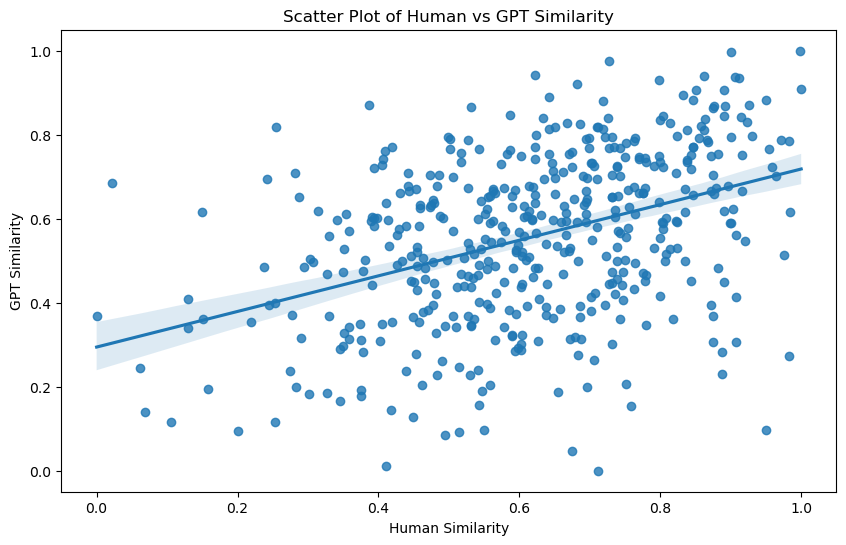

Correlation Coefficient: 0.4076391246925855
R-squared: 0.1661696559801379


In [63]:
plt.figure(figsize=(10, 6))
sns.regplot(x= x_value, y= y_value, data=data)
plt.title('Scatter Plot of Human vs GPT Similarity')
plt.xlabel('Human Similarity')
plt.ylabel('GPT Similarity')
plt.show()


correlation_coefficient = data[[x_value, y_value]].corr().iloc[0, 1]
print(f'Correlation Coefficient: {correlation_coefficient}')

X = data[[x_value]]
y = data[y_value]
model = LinearRegression().fit(X, y)
predictions = model.predict(X)
r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

## Right
Correlation Coefficient: 0.4032770791538552

R-squared: 0.1626324025708621

In [19]:
x_value = 'human_similarity'
y_value = 'gpt_similarity_right'

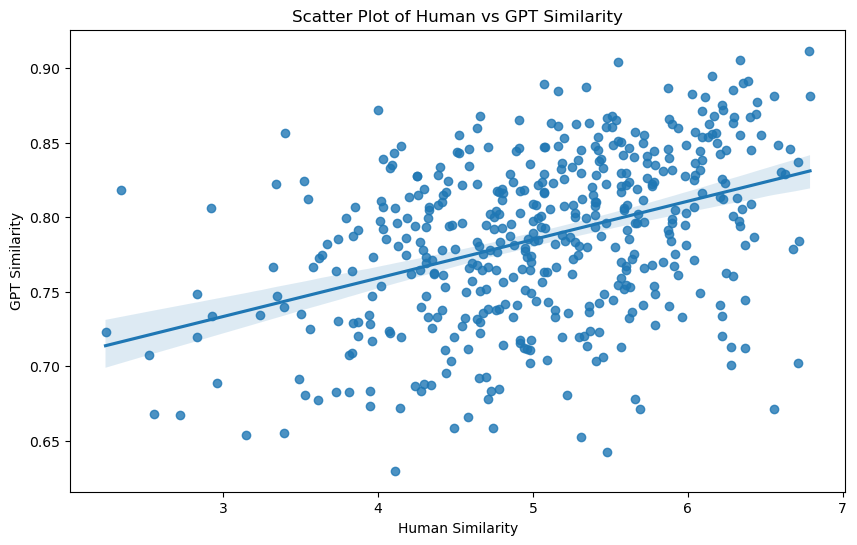

Correlation Coefficient: 0.4032770791538552
R-squared: 0.1626324025708621


In [20]:
plt.figure(figsize=(10, 6))
sns.regplot(x= x_value, y= y_value, data=data)
plt.title('Scatter Plot of Human vs GPT Similarity')
plt.xlabel('Human Similarity')
plt.ylabel('GPT Similarity')
plt.show()


correlation_coefficient = data[[x_value, y_value]].corr().iloc[0, 1]
print(f'Correlation Coefficient: {correlation_coefficient}')

X = data[[x_value]]
y = data[y_value]
model = LinearRegression().fit(X, y)
predictions = model.predict(X)
r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

## Left
Correlation Coefficient: 0.407192632757124

R-squared: 0.16580584017167876

In [23]:
x_value = 'human_similarity'
y_value = 'gpt_similarity_left'

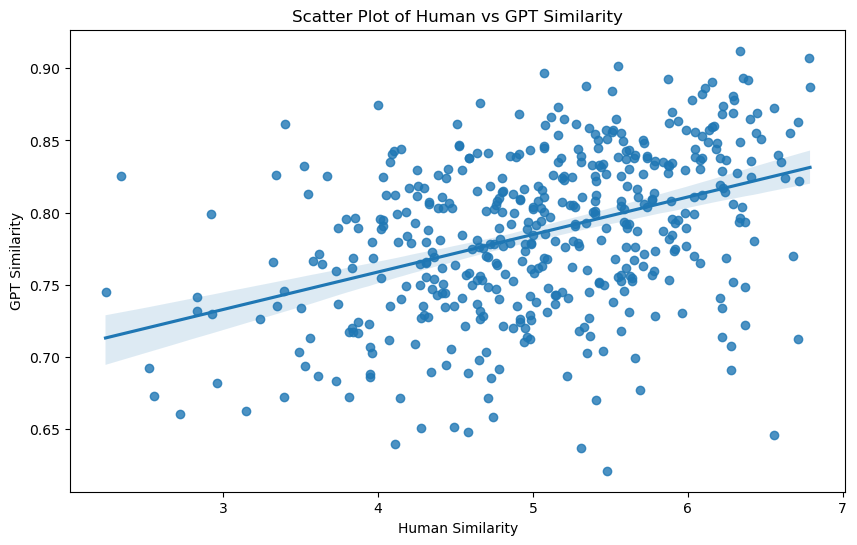

Correlation Coefficient: 0.407192632757124
R-squared: 0.16580584017167876


In [24]:
plt.figure(figsize=(10, 6))
sns.regplot(x= x_value, y= y_value, data=data)
plt.title('Scatter Plot of Human vs GPT Similarity')
plt.xlabel('Human Similarity')
plt.ylabel('GPT Similarity')
plt.show()


correlation_coefficient = data[[x_value, y_value]].corr().iloc[0, 1]
print(f'Correlation Coefficient: {correlation_coefficient}')

X = data[[x_value]]
y = data[y_value]
model = LinearRegression().fit(X, y)
predictions = model.predict(X)
r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

# Heatmap

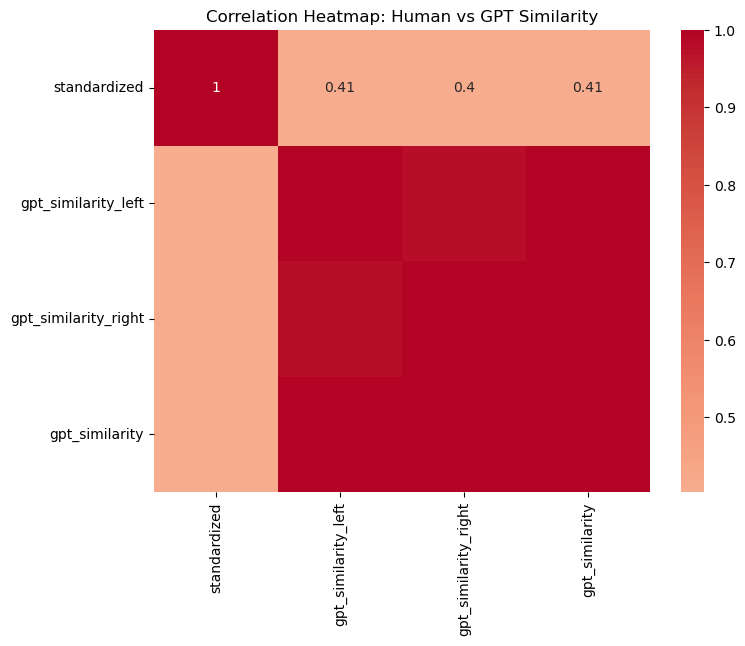

In [54]:
# Calculate the correlation matrix
corr_matrix = data[['standardized','gpt_similarity_left', 'gpt_similarity_right', 'gpt_similarity']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Human vs GPT Similarity')
plt.show()